In [14]:
import process_raw as pr
from impedance.models.circuits import Randles, CustomCircuit


In [ ]:
pr.process_raw_all('..\\raw_data\\'+'9.15 Cell Growth')

In [15]:
from impedance import preprocessing

frequencies, Z = preprocessing.readCSV(r'../processed_data/9.15 Cell Growth/Sensor0_Test_1_data.csv')

In [18]:
randlesCPE = Randles(initial_guess=[20, 20, .0001, .9, .001, 200], CPE=True)

In [20]:
randlesCPE.fit(frequencies, Z)
print(randlesCPE)


Name: Randles w/ CPE
Circuit string: R0-p(R1,CPE1)-Wo1
Fit: True

Initial guesses:
     R0 = 2.00e+01 [Ohm]
     R1 = 2.00e+01 [Ohm]
  CPE1_0 = 1.00e-04 [Ohm^-1 sec^a]
  CPE1_1 = 9.00e-01 []
  Wo1_0 = 1.00e-03 [Ohm]
  Wo1_1 = 2.00e+02 [sec]

Fit parameters:
     R0 = 1.07e+02  (+/- inf) [Ohm]
     R1 = 7.58e-04  (+/- inf) [Ohm]
  CPE1_0 = 3.28e-09  (+/- inf) [Ohm^-1 sec^a]
  CPE1_1 = 1.05e-01  (+/- inf) []
  Wo1_0 = 2.24e-14  (+/- inf) [Ohm]
  Wo1_1 = 2.23e+02  (+/- inf) [sec]



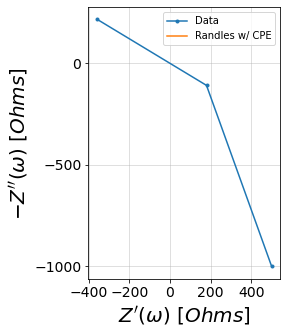

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from impedance.visualization import plot_nyquist

f_pred = np.logspace(6,2)

# randles_fit = randles.predict(f_pred)
randlesCPE_fit = randlesCPE.predict(f_pred)
# customCircuit_fit = customCircuit.predict(f_pred)
# customConstantCircuit_fit = customConstantCircuit.predict(f_pred)

fig, ax = plt.subplots(figsize=(5,5))

plot_nyquist(ax, Z)
# plot_nyquist(ax, randles_fit, fmt='-')
plot_nyquist(ax, randlesCPE_fit, fmt='-')
# plot_nyquist(ax, customCircuit_fit, fmt='-')
# plot_nyquist(ax, customConstantCircuit_fit, fmt='-')

# ax.legend(['Data', 'Randles', 'Randles w/ CPE', 'Custom Circuit', 'Custom Circuit w/ Constant R0 and W1_1'])
ax.legend(['Data', 'Randles w/ CPE'])
plt.show()